# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset. 
#Merge two DataFrames 
#See Pandas 4.3 Slides "Merging and Data Clean Proj." slides 4-8/30 regarding using an inner join, joining by "Mouse ID". 
#See Pandas GitLab Solutions Activity 2 Student Census Merging Solved & 4.3 Pandas Slides

merged_data = pd.merge(study_results_df, mouse_metadata_df, how='left', on='Mouse ID') 

# Display the merged data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
count = merged_data ["Mouse ID"].nunique()
count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. ??????
dup_md = merged_data[merged_data.duplicated (subset=["Mouse ID", "Timepoint"], keep= False)]['Mouse ID'].unique()
dup_md

#dup_merge = merge.duplicated (["Mouse ID", "Timepoint"], subset=["Mouse ID", "Timepoint"], keep= False)       
#dup_merge = merge.duplicated (["Mouse ID", "Timepoint"], subset= None, keep= False) 
            #AND
#dup_merge = merge.duplicated (["Mouse ID"], subset=None, keep= False) 
       #TypeError: duplicated() got multiple values for argument 'subset' 
#dup_merge

#merge[dup_merge]
#https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/
#https://www.machinelearningplus.com/pandas/pandas-duplicated/

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merged_data[merged_data['Mouse ID'] == 'g989']

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID']!='g989']
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
count = clean_data["Mouse ID"].nunique()
count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

var = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

std = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

sem = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


df_mouse = pd.DataFrame({"mean":mean, "median":median, "var":var, "std":std, "sem":sem})

df_mouse


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
        #-USE "data_file_df.describe()  # SEE GitLAB-4Pandas-pg 2-Actvy5-InsDataFunctions-Solved, df-SERIES info included 
    
    
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_TV = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

agg_TV

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
df_tp = clean_data.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending= False)
df_tp

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

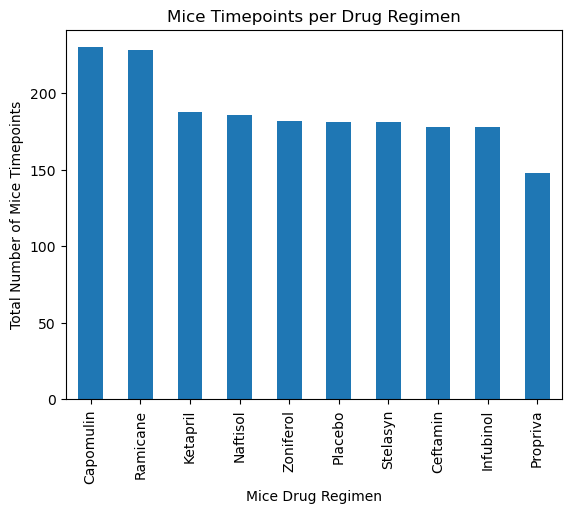

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Drug_Regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]
Mice_Ttl_Number_of_Timepoints = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

df_tp.plot(kind="bar");

plt.title("Mice Timepoints per Drug Regimen")
plt.xlabel("Mice Drug Regimen")
plt.ylabel("Total Number of Mice Timepoints")
plt.show()

<BarContainer object of 10 artists>

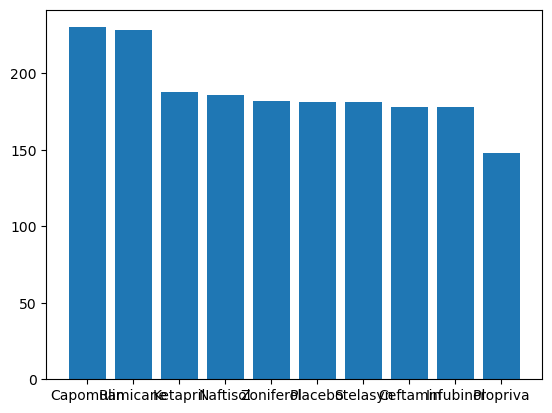

In [12]:
#Mat
plt.bar(df_tp.index.values, df_tp.values)

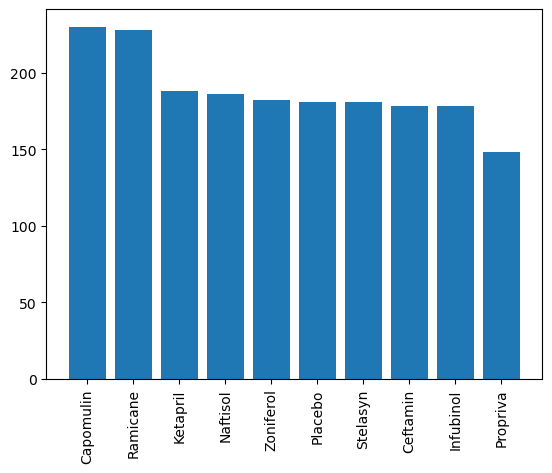

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(df_tp.index.values,df_tp.values)
plt.xticks(rotation=90)
plt.show()


In [14]:
gendercnt = clean_data.Sex.value_counts()
gendercnt


Male      958
Female    922
Name: Sex, dtype: int64

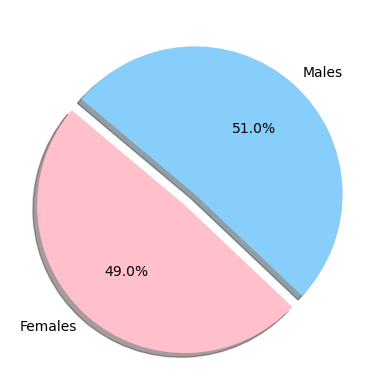

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

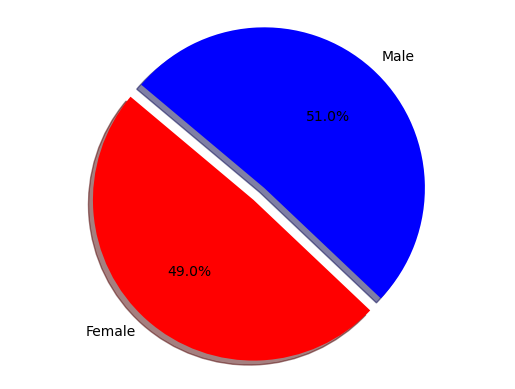

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Mice_Genders = ["Female", "Male"]
Total_G_Mice = [922, 958]
colors = ["red","blue"]
explode = (0.1,0)

plt.pie(Total_G_Mice, explode=explode, labels=Mice_Genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()

In [38]:
type(agg_TV)

pandas.core.frame.DataFrame

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [40]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_tmpts = clean_data.groupby("Mouse ID")["Timepoint"].max()
greatest_tmpts

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [41]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(clean_data, greatest_tmpts, on=["Mouse ID", "Timepoint"], how = "right")
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
trmnt_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in trmnt_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_drug = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volume.append(mice_on_drug)
    quartiles = mice_on_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = mice_on_drug.loc[(mice_on_drug < lower_bound) | (mice_on_drug > upper_bound)]
    print("{} has the outliers: {}".format(drug, outliers))
   

Capomulin has the outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has the outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has the outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has the outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


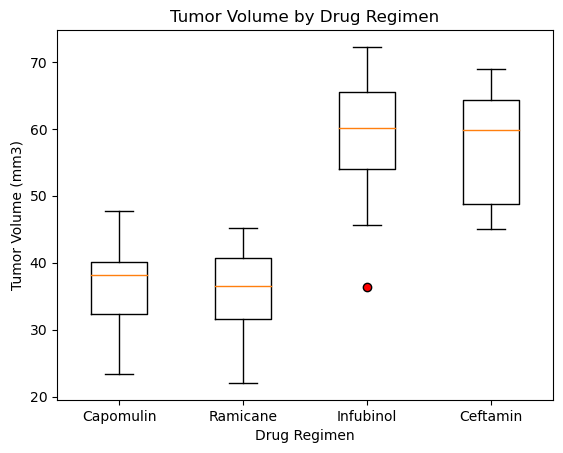

In [56]:
 # Create a boxplot with outliers in red
plt.boxplot(tumor_volume, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], showfliers=True, flierprops={"markerfacecolor": "red"})

# Set plot title and axis labels
plt.title("Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

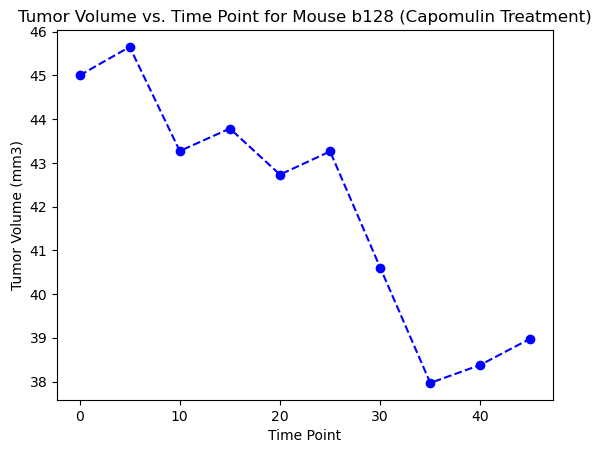

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter data for the specified mouse treated with Capomulin
mouse_id = "b128"
treatment = "Capomulin"
mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == treatment)]

# Create the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='--', color='b')

# Set plot title and axis labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

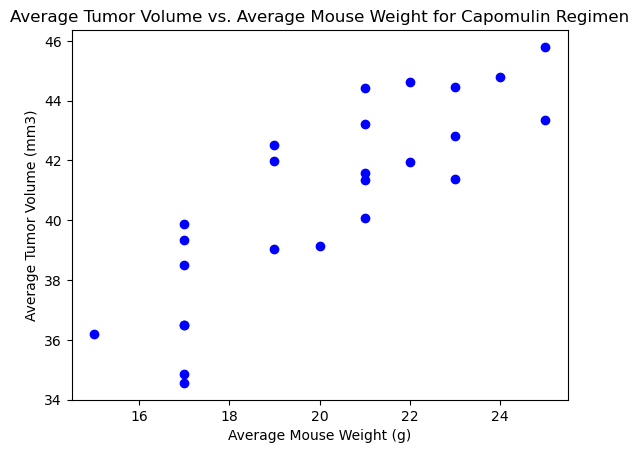

In [62]:
# Generate a scatter plot of average tumor volume vs.average mouse weight for the Capomulin regimen
df_capumolin = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume and average mouse weight per mouse ID
average_tumor_volume = df_capumolin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_mouse_weight = df_capumolin.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.scatter(average_mouse_weight, average_tumor_volume, marker='o', color='b')

# Set plot title and axis labels
plt.title("Average Tumor Volume vs. Average Mouse Weight for Capomulin Regimen")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

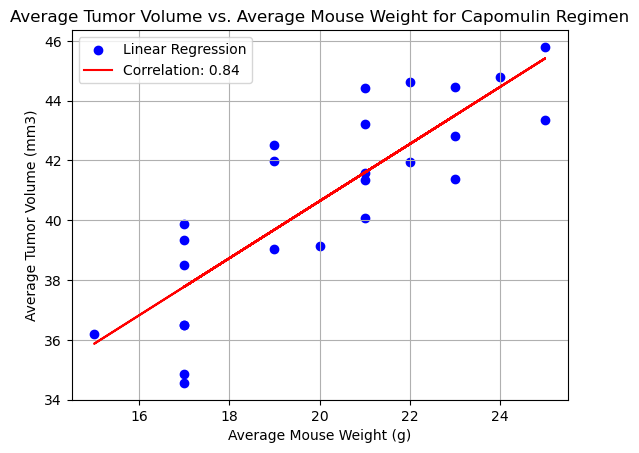

Linear Regression Model: y = 0.95 * x + 21.55
Correlation Coefficient: 0.84
R-squared Value: 0.71
P-value: 0.00


In [63]:
# Calculate the correlation coefficient and linear regression model 
# for average mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = average_mouse_weight.corr(average_tumor_volume)

# Create a scatter plot
plt.scatter(average_mouse_weight, average_tumor_volume, marker='o', color='b')

# Set plot title and axis labels
plt.title("Average Tumor Volume vs. Average Mouse Weight for Capomulin Regimen")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(average_mouse_weight, average_tumor_volume)

# Plot the regression line
plt.plot(average_mouse_weight, slope * average_mouse_weight + intercept, color='r')

# Show the plot
plt.grid()
plt.legend(['Linear Regression', f'Correlation: {correlation_coefficient:.2f}'])
plt.show()

# Display the linear regression model parameters
print(f"Linear Regression Model: y = {slope:.2f} * x + {intercept:.2f}")
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"R-squared Value: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
